In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import numpy as np

In [2]:
movies = pd.read_csv("my_movies.csv")
movies

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [3]:
movies1=movies.iloc[:,5:]
movies1

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [4]:
df=pd.get_dummies(movies1)
df

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [5]:
#aprori algorithm
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
frequent_itemsets


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [8]:
#changing the min support, we can observe the number of itemsets are reducing.
frequent_itemsets2= apriori(df, min_support=0.2, use_colnames=True)
frequent_itemsets2


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Gladiator, Sixth Sense)"
8,0.4,"(Patriot, Sixth Sense)"
9,0.2,"(Green Mile, Sixth Sense)"


In [9]:

frequent_itemsets3 = apriori(df, min_support=0.3, use_colnames=True)
frequent_itemsets3


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.5,"(Gladiator, Sixth Sense)"
4,0.4,"(Patriot, Sixth Sense)"
5,0.6,"(Gladiator, Patriot)"
6,0.4,"(Gladiator, Patriot, Sixth Sense)"


In [10]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
3,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
4,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
...,...,...,...,...,...,...,...,...,...
124,"(Harry Potter1, Sixth Sense)","(LOTR1, LOTR2, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
125,"(LOTR1, Sixth Sense)","(Harry Potter1, Green Mile, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
126,"(LOTR2, Sixth Sense)","(LOTR1, Harry Potter1, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
127,"(LOTR1, Harry Potter1)","(LOTR2, Green Mile, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


In [11]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
128,"(Harry Potter1, LOTR2)","(LOTR1, Green Mile, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
104,"(Harry Potter1, LOTR2)","(LOTR1, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
101,"(LOTR1, Harry Potter1)","(LOTR2, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
66,"(LOTR1, Harry Potter1)","(LOTR2, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
95,"(LOTR2, Green Mile)","(Harry Potter1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
93,"(Harry Potter1, Sixth Sense)","(LOTR2, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
92,"(Harry Potter1, Green Mile)","(LOTR2, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
39,"(Gladiator, Green Mile)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf
87,"(LOTR2, Sixth Sense)","(LOTR1, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42,(LOTR),"(Gladiator, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf


In [12]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
3,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
4,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
...,...,...,...,...,...,...,...,...,...
124,"(Harry Potter1, Sixth Sense)","(LOTR1, LOTR2, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
125,"(LOTR1, Sixth Sense)","(Harry Potter1, Green Mile, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
126,"(LOTR2, Sixth Sense)","(LOTR1, Harry Potter1, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
127,"(LOTR1, Harry Potter1)","(LOTR2, Green Mile, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


In [20]:
#changing the minimum threshold for confidence,we get different no of rules
#here min support is .2 

rules1 = association_rules(frequent_itemsets2, metric="confidence", min_threshold=0.8)
rules1


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
2,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
3,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
4,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
5,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
6,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
7,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf


In [15]:
#here we are giving the min support as .2 and threshold for confidence as .9,hence we could reduce the rules number to 4

rules2 = association_rules(frequent_itemsets2, metric="confidence", min_threshold=0.9)
rules2


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.0,1.666667,0.08,inf
1,(Patriot),(Gladiator),0.6,0.7,0.6,1.0,1.428571,0.18,inf
2,(LOTR1),(LOTR2),0.2,0.2,0.2,1.0,5.000000,0.16,inf
3,(LOTR2),(LOTR1),0.2,0.2,0.2,1.0,5.000000,0.16,inf
4,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.0,1.428571,0.12,inf


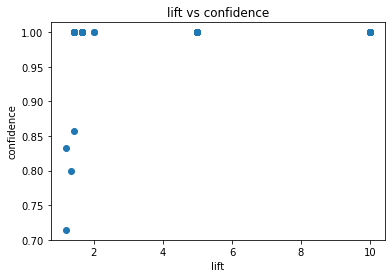

In [27]:
# different scatter plots between lift and confidence
plt.scatter('lift','confidence',data=rules)
plt.xlabel('lift')
plt.ylabel('confidence')
plt.title('lift vs confidence')
plt.show()

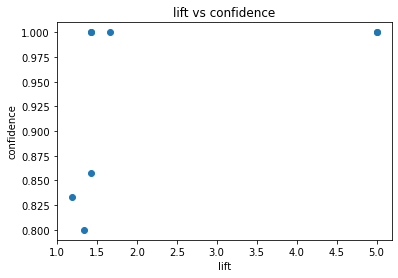

In [26]:
plt.scatter('lift','confidence',data=rules1)
plt.xlabel('lift')
plt.ylabel('confidence')
plt.title('lift vs confidence')          
plt.show()

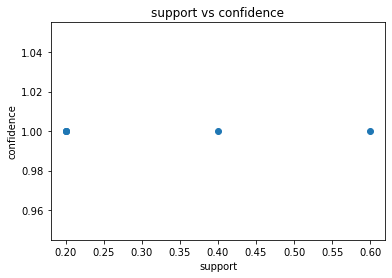

In [32]:
plt.scatter('support','confidence',data=rules2)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('support vs confidence')
plt.show()                           #here for different supports we have a constant confidence

<AxesSubplot:>

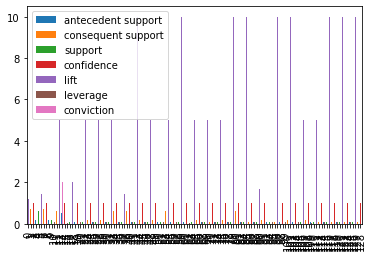

In [29]:
#bar plots
rules.plot(kind="bar")

<AxesSubplot:>

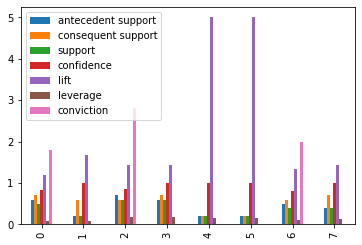

In [30]:
rules1.plot(kind="bar")

<AxesSubplot:>

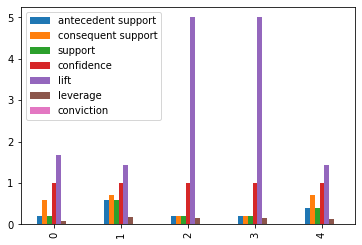

In [31]:
rules2.plot(kind="bar")